In [2]:
import pickle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#Importing the Dataset
#dataset = pd.read_csv('2021_10_24_cleaned_lake_dataset.csv', header=0, index_col=0)
dataset = pd.read_csv('2021_11_03_cleaned_lake_dataset_feb-apr.csv', header=0, index_col=0)
dataset = dataset.rename(columns={'actual_conductivity':'cond', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset = dataset[['temp', 'cond', 'do', 'turb', 'chl-a']]
# dataset = dataset.diff()
# dataset = dataset.dropna()
dataset = dataset.reset_index()
dataset.head()

datetime  temp  cond   do  turb  chl-a
0  2019-02-20 12:00:00 29.56 92.13 6.49 32.87  39.65
1  2019-02-20 12:10:00 29.59 92.23 6.72 24.30  40.57
2  2019-02-20 12:20:00 29.58 91.93 6.68 47.46  40.88
3  2019-02-20 12:30:00 29.63 92.45 7.54 55.04  46.68
4  2019-02-20 12:40:00 29.64 92.79 7.63 26.58  47.05

In [14]:
filename = 'model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [15]:
#Preparing Input & Output Features
X = dataset[:]
Y = X.pop('chl-a')
print(X.shape)
print(Y.shape)
Y.head()

(6212, 5)
(6212,)


0   39.65
1   40.57
2   40.88
3   46.68
4   47.05
Name: chl-a, dtype: float64

0.997555972083391


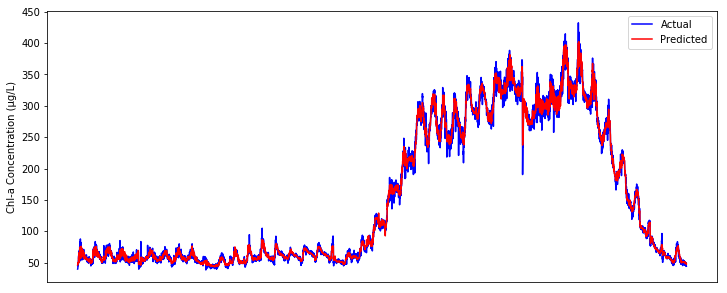

In [20]:
result = loaded_model.score(X,Y)
predicted_Y = pd.DataFrame(loaded_model.predict(X))
print(result)

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (Âµg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel('February to March')
plt.legend()
plt.show()
